### Predicting type of cancer using mRNA data.
#### Using Support Vector Machine (Supervised Machine Learning Algorithm)

In [39]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.metrics import plot_confusion_matrix

### 3,000 features of mRNA quantifications for genes

In [40]:
data = pd.read_csv('homework4_input_data.csv')
X = data.iloc[:, 1:-1]
Y = data.iloc[:, -1]

### Transform mRNA features into 2D using PCA. 

In [41]:
#https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

pca = PCA(n_components=2)
pcaComponents = pca.fit_transform(X)
pcaDf = pd.DataFrame(data=pcaComponents, columns=['PCA 1', 'PCA 2'])
finalDf = pd.concat([pcaDf, Y], axis=1)

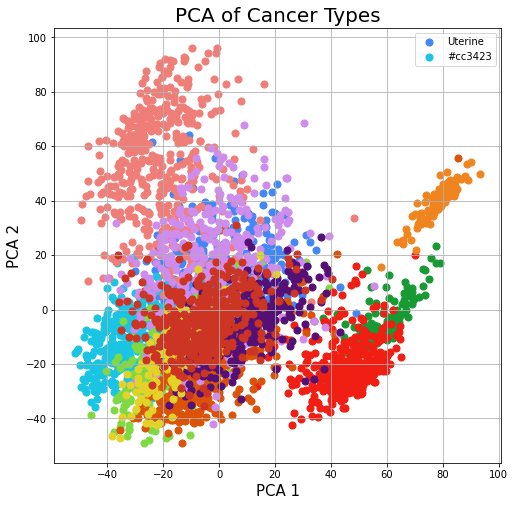

In [42]:
#https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('PCA 1', fontsize=15)
ax.set_ylabel('PCA 2', fontsize=15)
ax.set_title('PCA of Cancer Types', fontsize=20)

colors = {"Breast": '#4287f5',
"Bladder": '#19c5e3',
"Colon": '#80d941',
"Glioblastoma": '#179933',
"Head&Neck": '#f07e78',
"Kidney": '#f01e13',
"Leukemia": '#f0841f',
"LungAdeno": '#db5209',
"LungSquamous": '#ce8ced',
"Ovarian": '#551075',
"Rectal": '#e3d329',
"Uterine": '#cc3423'}

cancer_type = colors.keys()
color = colors.values()

for item in colors.items():
    indicesToKeep = finalDf['Class'] == item[0]
    ax.scatter(finalDf.loc[indicesToKeep, 'PCA 1'], finalDf.loc[indicesToKeep, 'PCA 2'], c=item[1], s=50)
ax.legend(item)
ax.grid()

### Break up the data & stratify it (each cancer type represented equally in each fold)

In [43]:
X = StandardScaler().fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify=Y)

In [44]:
model = LinearSVC(multi_class='ovr', class_weight='balanced')

### View results from 5 fold stratified cross validation

In [45]:
result = cross_val_score(model, X_train, Y_train, cv=5, n_jobs=-1)

print('Individual cross-validation accuracies')
print(result)
print('Mean cross validation result ')
print(np.mean(result))

Individual cross-validation accuracies
[0.96 0.97 0.96 0.97 0.97]
Mean cross validation result 
0.9639574002686395


### Train the model using Linear SVM.

In [48]:
model.fit(X_train, Y_train)

print('Accuracy of linear SVC on training set: {:.2f}'.format(model.score(X_train, Y_train)))

print('Accuracy of linear SVC on test set: {:.2f}'.format(model.score(X_test, Y_test)))

Accuracy of linear SVC on training set: 1.00
Accuracy of linear SVC on test set: 0.98


### Confusion matrix of normalized & non-normalized predictions.

Confusion matrix, without normalization
[[ 66   0   0   0   0   0   0   0   0   0   0   0]
 [  0 175   0   0   0   0   0   0   0   0   0   0]
 [  0   0  69   0   0   0   0   0   0   0   5   0]
 [  0   0   0  21   0   0   0   0   0   0   0   2]
 [  0   0   0   0  83   0   0   0   0   0   0   0]
 [  0   0   0   0   0  84   0   0   0   0   0   0]
 [  0   0   0   0   0   0  20   0   0   0   0   0]
 [  0   0   0   0   0   0   0  83   2   0   0   0]
 [  0   0   0   0   0   0   2   2  74   0   0   0]
 [  0   0   0   0   0   0   0   0   0  68   0   0]
 [  0   0   8   0   0   0   0   0   0   0  18   0]
 [  0   0   0   0   0   0   0   0   0   0   0  86]]
Normalized confusion matrix
[[1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.93 0.   0.   0.   0.   0.   0.   0.   0.07 0.  ]
 [0.   0.   0.   0.91 0.   0.   0.   0.   0.   0.   0.   0.09]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.

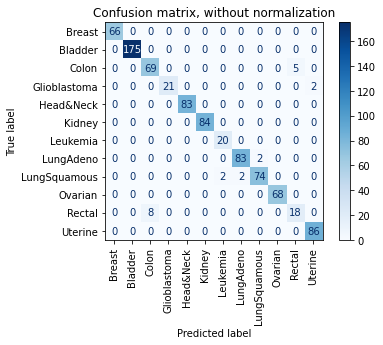

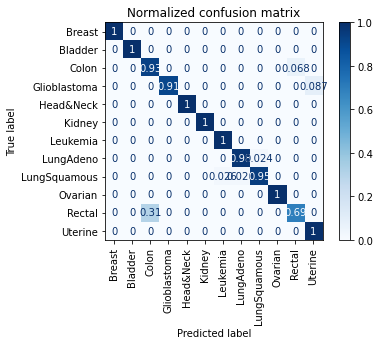

In [49]:
# this code is adopted from this example:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

np.set_printoptions(precision=2)
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, Y_test,
                                 display_labels=cancer_type,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.tick_params(axis='x', rotation=90)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()